Restuarant Inspections
=======

Since my other economic indicators don't have the required geospatial details, I'm going to see if restaurant inspections could be a decent indicator.

In [2]:
%matplotlib inline

from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists
import psycopg2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
filename = 'other_data/restaurant_inspections.csv'

# cols = ['DBA', 'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'GRADE', 'INSPECTION TYPE']
data = pd.read_csv(filename, header=0, parse_dates=['INSPECTION DATE', 'GRADE DATE', 'RECORD DATE'],
                   infer_datetime_format=True)
new_cols = ['_'.join(s.lower().split()) for s in data.columns]
data.columns = new_cols
data.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type
0,41468119,NANSEN LODGE SOCIAL CLUB,STATEN ISLAND,3441,VICTORY BOULEVARD,10314.0,7189830464,American,2016-06-03,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,2016-06-03,2017-06-06,Cycle Inspection / Initial Inspection
1,41112524,ADRIENNE'S PIZZA BAR,MANHATTAN,54,STONE STREET,10004.0,2122483838,Italian,2015-11-12,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,2015-11-12,2017-06-06,Cycle Inspection / Initial Inspection
2,50002713,TARTINERY (THE PLAZA SHOPS),MANHATTAN,1,W 58TH STREET,10019.0,6467553231,American,2016-04-01,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,36.0,NaN,NaT,2017-06-06,Cycle Inspection / Initial Inspection
3,41695981,PICO DE GALLO,QUEENS,8212,ROOSEVELT AVENUE,11372.0,7186390808,Spanish,2016-01-11,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,20.0,NaN,NaT,2017-06-06,Cycle Inspection / Initial Inspection
4,50050808,SICHUAN CUISINE,QUEENS,13620,ROOSEVELT AVE,11354.0,7187372900,Asian,2017-03-20,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,4.0,P,2017-03-20,2017-06-06,Cycle Inspection / Reopening Inspection


In [8]:
data_drop = data.dropna(subset=['camis', 'dba', 'boro', 'building', 'street',
                                'zipcode', 'cuisine_description', 'inspection_date'])
# data_drop[data_drop.action.isnull()].count()
data_drop.shape, data.shape

((415028, 18), (415435, 18))

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/opt/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


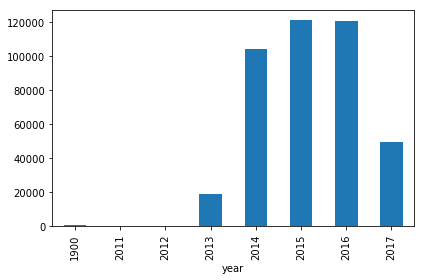

In [12]:
data_drop['year'] = data_drop.inspection_date.dt.year
data_drop.groupby('year')['cuisine_description'].count().plot(kind='bar')